In [1]:
import importlib
import sys
import pickle
import numpy as np

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')
sys.path.insert(0, '../../../..')
sys.path.insert(0, '../../../../..')
sys.path.insert(0, '../../../../../..')
sys.path.insert(0, '../../../../../../..')


In [2]:
import src.evaluation_metrics.conduct_evaluation
importlib.reload(src.evaluation_metrics.conduct_evaluation)

import src.evaluation_metrics.metrics
importlib.reload(src.evaluation_metrics.metrics)

<module 'src.evaluation_metrics.metrics' from '/home/LordKunkler/probabilistic_suffix_prediction_lab/probabilistic_suffix_prediction_dev/src/reimplemented_comparable_approaches/camargo_LSTM_suffix_pred/notebooks/evaluation/Sepsis/../../../../../../src/evaluation_metrics/metrics.py'>

In [3]:
import src.evaluation_metrics.plots
importlib.reload(src.evaluation_metrics.plots)

output_dirs = ['../../../../../../../../data/Sepsis/eval_camargo_sl5/']

all_results = dict()

for output_dir in output_dirs:
    evaluation_metrics = {
        'NormalizedDamerauLevenshteinMeanVar_activity' : src.evaluation_metrics.metrics.NormalizedDamerauLevenshteinDistanceMeanVar('concept:name', percentile=0.25),
        'SuffixCountMAE' : src.evaluation_metrics.metrics.SuffixCountMAE(percentile=0.25),
        
        'SuffixCountInterval_50' : src.evaluation_metrics.metrics.SuffixCountInterval(percentile=0.50),
        'SuffixCountInterval_75' : src.evaluation_metrics.metrics.SuffixCountInterval(percentile=0.75),
        'SuffixCountInterval_90' : src.evaluation_metrics.metrics.SuffixCountInterval(percentile=0.90),
        'SuffixCountInterval_95' : src.evaluation_metrics.metrics.SuffixCountInterval(percentile=0.95),
        'SuffixCountInterval_99' : src.evaluation_metrics.metrics.SuffixCountInterval(percentile=0.99),
    }

    res_raw, c = src.evaluation_metrics.conduct_evaluation.batch_evaluate(output_dir, evaluation_metrics)
    #res_raw, c = src.evaluation_metrics.conduct_evaluation.evaluate_sequentially(output_dir, evaluation_metrics)
    all_results[output_dir] = (res_raw, c)

with open("Sepsis_eval.pkl", "wb") as file:
    pickle.dump(all_results, file)

Loaded: results_part_1050.pkl
Loaded: results_part_050.pkl
Loaded: results_part_1000.pkl
Loaded: results_part_100.pkl
Loaded: results_part_1200.pkl
Loaded: results_part_1150.pkl
Loaded: results_part_1100.pkl
Loaded: results_part_1250.pkl
Loaded: results_part_1350.pkl
Loaded: results_part_1400.pkl
Loaded: results_part_1450.pkl
Loaded: results_part_150.pkl
Loaded: results_part_1300.pkl
Loaded: results_part_1600.pkl
Loaded: results_part_1650.pkl
Loaded: results_part_1700.pkl
Loaded: results_part_1500.pkl
Loaded: results_part_250.pkl
Loaded: results_part_200.pkl
Loaded: results_part_300.pkl
Loaded: results_part_1550.pkl
Loaded: results_part_350.pkl
Loaded: results_part_400.pkl
Loaded: results_part_450.pkl
Loaded: results_part_600.pkl
Loaded: results_part_650.pkl
Loaded: results_part_500.pkl
Loaded: results_part_550.pklLoaded: results_part_700.pkl

Loaded: results_part_800.pkl
Loaded: results_part_900.pkl
Loaded: results_part_850.pkl
Loaded: results_part_950.pkl
Loaded: results_part_750.pkl

dict_keys(['NormalizedDamerauLevenshteinMeanVar_activity', 'SuffixCountMAE', 'SuffixCountInterval_50', 'SuffixCountInterval_75', 'SuffixCountInterval_90', 'SuffixCountInterval_95', 'SuffixCountInterval_99'])
7
2
2
dict_keys([('SuffixCountMAE', 'Suffix length MAE'), ('NormalizedDamerauLevenshteinMeanVar_activity', 'DLS')])


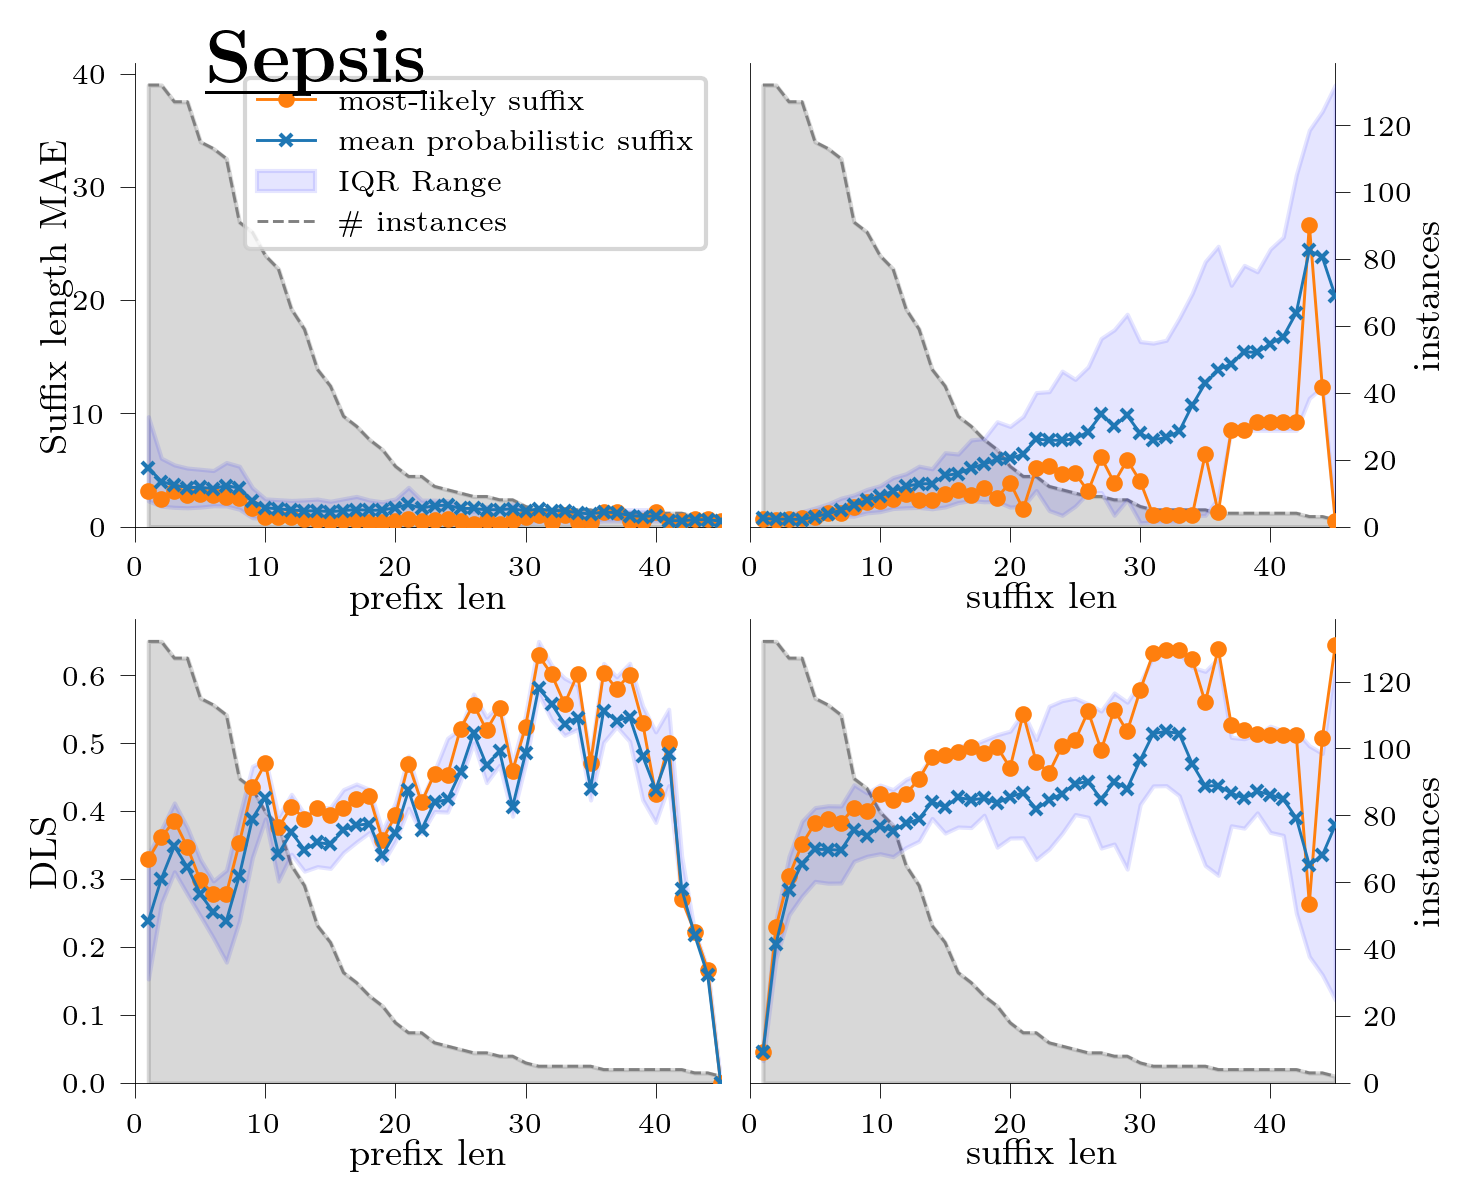

In [4]:
with open("Sepsis_eval.pkl", "rb") as file:
    all_results = pickle.load(file)

import src.evaluation_metrics.plots
importlib.reload(src.evaluation_metrics.plots)

res_raw, c = all_results['../../../../../../../../data/Sepsis/eval_camargo_sl5/']

keys_to_keep = [
                ('SuffixCountMAE', 'Suffix length MAE'),
                ('NormalizedDamerauLevenshteinMeanVar_activity', 'DLS'),
                # ('SuffixCountInterval_50', 'SuffixCountInterval_50'),
                # ('SuffixCountInterval_75', 'SuffixCountInterval_75'),
                # ('SuffixCountInterval_90', 'SuffixCountInterval_90'),
                # ('SuffixCountInterval_95', 'SuffixCountInterval_95'),
                # ('SuffixCountInterval_99', 'SuffixCountInterval_99'),
                ]

res = {(k, label) : res_raw[k] for k, label in keys_to_keep}
print(res_raw.keys())
print(len(res_raw.keys()))
print(len(res.keys()))
print(len(keys_to_keep))
print(res.keys())
p = src.evaluation_metrics.plots.plot_res(res, c, columns=2, caption='Sepsis', pgf=True) #int(len(keys_to_keep)))
with open('Sepsis.pgf', 'wb') as f:
    f.write(p)

In [5]:
print('Suffix length MAE')
print(np.mean([i['mean'] for i in res_raw['SuffixCountMAE'].values()]))
print('Probabilistic suffix length MAE')
print(np.mean([i['prob'][0] for i in res_raw['SuffixCountMAE'].values()]))

print('DLS')
print(np.mean([i['mean'] for i in res_raw['NormalizedDamerauLevenshteinMeanVar_activity'].values()]))
print('Probabilistic DLS')
print(np.mean([i['prob'][0] for i in res_raw['NormalizedDamerauLevenshteinMeanVar_activity'].values()]))


Suffix length MAE
1.901764705882353
Probabilistic suffix length MAE
2.813144117647059
DLS
0.3732658786541067
Probabilistic DLS
0.32970053940026656


In [6]:

keys_to_keep = [
                # ('SumValuesInterval_50', 'SumValuesInterval_50'),
                # ('SumValuesInterval_75', 'SumValuesInterval_75'),
                # ('SumValuesInterval_90', 'SumValuesInterval_90'),
                # ('SumValuesInterval_95', 'SumValuesInterval_95'),
                # ('SumValuesInterval_99', 'SumValuesInterval_99'),
]

# res_1 = {(k, label) : res_raw[k] for k, label in keys_to_keep}
res_1 = {}

keys_to_keep = [
                ('SuffixCountInterval_50', 'SuffixCountInterval_50'),
                ('SuffixCountInterval_75', 'SuffixCountInterval_75'),
                ('SuffixCountInterval_90', 'SuffixCountInterval_90'),
                ('SuffixCountInterval_95', 'SuffixCountInterval_95'),
                ('SuffixCountInterval_99', 'SuffixCountInterval_99'),
]

res_2 = {(k, label) : res_raw[k] for k, label in keys_to_keep}

# p = src.evaluation_metrics.plots.plot_2_intervals(res_1, res_2, caption='Helpdesk', pgf=True)#int(len(keys_to_keep)))

# with open('Helpdesk_intervals_suffix.pgf', 'wb') as f:
#    f.write(p)

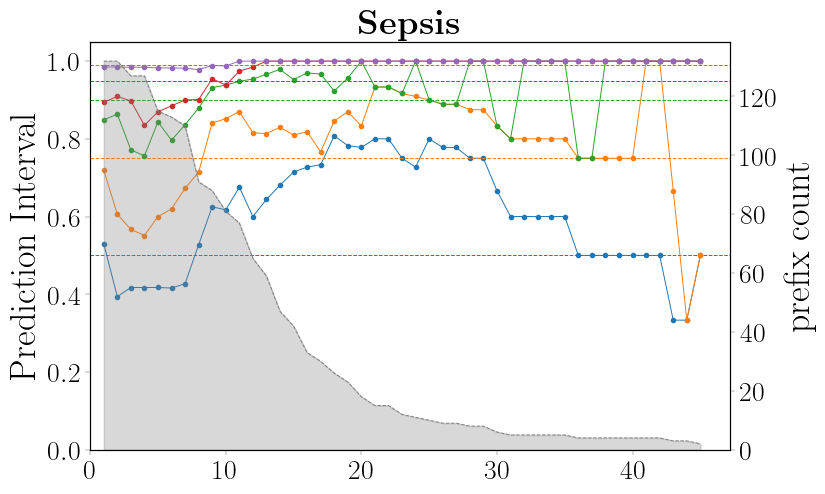

In [7]:
keys_to_keep = [
                ('SuffixCountInterval_50', 'SuffixCountInterval_50'),
                ('SuffixCountInterval_75', 'SuffixCountInterval_75'),
                ('SuffixCountInterval_90', 'SuffixCountInterval_90'),
                ('SuffixCountInterval_95', 'SuffixCountInterval_95'),
                ('SuffixCountInterval_99', 'SuffixCountInterval_99'),
]

res = {(k, label) : res_raw[k] for k, label in keys_to_keep}

p = src.evaluation_metrics.plots.plot_intervals(res, caption='Sepsis', pgf=True)#int(len(keys_to_keep)))

with open('Sepsis_intervals_suffix.pgf', 'wb') as f:
    f.write(p)

In [8]:
res_raw['SuffixCountInterval_50']

{('NZ', 8, 8): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('NZ', 9, 7): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('NZ', 10, 6): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('NZ', 11, 5): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('NZ', 12, 4): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('NZ', 13, 3): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('NZ', 14, 2): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('NZ', 15, 1): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('OE', 1, 4): {'mean': 0, 'prob': (np.False_, (0, 0))},
 ('OE', 2, 3): {'mean': 0, 'prob': (np.False_, (0, 0))},
 ('OE', 3, 2): {'mean': 0, 'prob': (np.False_, (0, 0))},
 ('OE', 4, 1): {'mean': 0, 'prob': (np.False_, (0, 0))},
 ('OGA', 1, 7): {'mean': 0, 'prob': (np.True_, (0, 0))},
 ('OGA', 2, 6): {'mean': 0, 'prob': (np.False_, (0, 0))},
 ('OGA', 3, 5): {'mean': 0, 'prob': (np.False_, (0, 0))},
 ('OGA', 4, 4): {'mean': 0, 'prob': (np.False_, (0, 0))},
 ('OGA', 5, 3): {'mean': 0, 'prob': (np.False_, (0, 0))},
 ('OGA', 6, 2): {'mean': 0, '